## One-Sample t-tests
One sample t-tests are used to compare the mean of some data with a known value.  Because it is unlikely that you will be comparing your sample data with a known population mean that has a known population standard error, we will focus on t- and not z-tests.

### Load Packages

In [1]:
library(tidyverse)
library(DescTools)
library(plotrix)
library(lsr)
library(pwr)
library(readxl)

options(repr.plot.width=5, repr.plot.height=5) ## set options for plot size within the notebook -
# this is only for jupyter notebooks, you can disregard this.

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


We'll use the mtcars dataset for this example

In [ ]:
head(mtcars)  ## remind ourselves of the setup of the mtcars dataset.

## One-Sample t-test
We want to know if the average mpg of the cars in our sample `mtcars` is lower than the current national average of 24.7 mpg.

How would we run a hypothesis test for this?

### Step 1 - Formulate Hypothesis

Population mean is $\mu$, which specified in our question - 24.7mpg

Sample mean is $\bar{x}$ which we will calculate from our data.

$H_0 : \bar{x} = 24.7$

$H_A : \bar{x} < 24.7$

**Note:** Given our $H_A$ we're running a one-tailed test.


### Step 2 - Prepare and Check Conditions

Set alpha ->>> $\alpha = 0.05$

Random and independent sample ->>> assumed for now

Sample is <10% of the population? ->>> Yes

Let's take a look at our distribution and summary statistics first to get an idea of our sample data.

In [ ]:
## IS OUR SAMPLE DISTRIBUTION NORMAL?
qqnorm(mtcars$mpg) ## calculate QQ values
qqline(mtcars$mpg, col="red")  ## create QQ plot


In [ ]:
summary(mtcars$mpg) ## summary statistics - mean, median, min, max, etc.
sd(mtcars$mpg) ## standard deviation
std.error(mtcars$mpg) ## standard error

## show that the standard error is sd/sqrt(n)
sd(mtcars$mpg)/sqrt(length(mtcars$mpg))

## what is our n?
length(mtcars$mpg)

Our sample data deviates from normality a bit in the tails, but it's actually not that bad in terms of approximating a normal distribution.

So we can already see that our sample mean is 20.09, which is lower than 24.7, but is the difference statistically significant?

### Step 3 - Calculate t-statistic and p-value

In [ ]:
## using t.test to calculate one-sample t-statistic - t.test(VECTOR, mu, alternative = "one.sided" or" less" or "greater",
                                                                                                # conf= 1- alpha)

mpg_less_test <- t.test(mtcars$mpg, mu = 24.7, alternative = "less", conf = 0.95)
mpg_less_test

**So what we see in the output is:**

our t-statistic/t-value is -4.3263

we have 31 degrees of freedom (n-1)

It tells us in words what our H_A is

and it gives us a 95% CI.  This is the 95% CI related to the "less than" hypothesis, therefore it starts at -Inf, because we're looking at that side of the distribution.  

If we wanted a 95% CI as a range, we'd run a two-sided test.

In [ ]:
## rerunning t.test to obtain centered 95% CI

t.test(mtcars$mpg, mu = 24.7, alternative = "two.sided", conf = 0.95)

This gives a 95% CI centered around our sample mean, but it also is testing a different alternative hypothesis, whether the mean is different from 24.7 in any direction.

### Going back to our one-sided test, lets graph our results.

In [ ]:
dof <- mpg_less_test$parameter
tvalue <- mpg_less_test$statistic
tcrit <- qt(0.05, df = dof)

ggplot(data.frame(x = c(-5, 5)), aes(x = x)) + 
    stat_function(fun = dt, args = list(0.05,df = dof)) +  ## dt is the density function for t
     stat_function(fun = dt, 
                  args = list(0.05, df = dof),
                  xlim = c(-5,tcrit),  
                  geom = "area",
                  alpha=0.2) +
    labs(x = "t",y="") + 
    geom_vline(xintercept = tvalue, color = "red") +
    annotate(geom="text", x=tcrit, y=-0.004, label=paste("critical t = ", round(tcrit, digits = 3)),
             color="blue", fontface = 2, size = 4bel=paste("t-value =", round(tvalue, digits = 2)),
             color="red", fontface = 2, size = 4)) +  ## x and y tell ggplot the coords to place your words
    annotate(geom="text", x=tvalue+1.5, y=0.2, la

### Effect Size

We now want to know how big the difference is between our sample mean and the population mean.  For this we will calculate Cohen's d.

In [ ]:
cohensD(mtcars$mpg, 24.7) ## cohen's d function, two arguments, our vector of data, and our population mean

Our "rule of thumb" for interpreting Cohen's d is:

| Cohen's d | Effect Size |
|:---------:|:-----------:|
| 0.20 | Small |
| 0.50 | Medium|
| 0.80 | Large |

So our value of 0.765 is consistent with a decent effect size (e.g. difference between sample mean and null hypothesis mean).  Would you consider a difference of about 4.7 mpg a difference that would be important in the real world?

### Power

Finally, we want to see how much power our test has.  To conduct a power analysis we need 5 of the 6 pieces of information:

- n: sample size
- d: effect size (in this case cohensD)
- sig.level: alpha
- power: power (1-$\beta$)
- alternative: type of alternative hypothesis (two.sided, less, or greater)
- type: right now we're only looking at one.sample tests

When we run the power function we set one of these things to NULL, to calculate that value based on the other inputs.  Typically we will either be wanting to calculate a sample size *a priori* or to calculate the power of an analysis after you conduct the analysis.

We want to get the power for our mpg analysis, so we know our arguments will be:

- n = 32
- d = 0.765
- sig.level = 0.05
- power = NULL
- alternative = "two-sided" - Let's look at the more "conservative" version of the test.
- type = "one.sample"


In [ ]:
x <- pwr.t.test(d = 0.765, n = 32, sig.level=0.05, power = NULL, alternative = "two.sided", type = "one.sample")
x

Our power is extremely high.  If we only wanted to have a power of 0.80 we wouldn't have needed as large of a sample, given our effect size:

In [ ]:
pwr.t.test(d = 0.765, n = NULL, sig.level=0.05, power = 0.80, alternative = "two.sided", type = "one.sample")

## One Sample t-test - Proportions

At the most basic level a proportion is a mean of a vector of 0/1 observations.  Given this, we can also do t-tests to calculate the difference in proportions.

For this we'll use the small_gss dataset.

In [3]:
small_gss <- read_xls("small_gss.xls")
head(small_gss)

id_,year,abdefect,abnomore,abhlth,abpoor,abrape,absingle,abany,realinc,...,childs,age,educ,sex,partyid,spkath,spkrac,spkcom,spkmil,sexnow
1,2016,Yes,Yes,Yes,Yes,Yes,Yes,Yes,131676.7,...,3,47,16,Male,Independent,Allowed,Allowed,Allowed,Allowed,Not applicable
2,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,25740.0,...,0,61,12,Male,"Ind,near dem",Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
3,2016,No,No,Yes,No,Yes,No,No,38610.0,...,2,72,16,Male,Not str republican,Allowed,Allowed,Allowed,Allowed,Not applicable
4,2016,No,No,Yes,No,Yes,No,No,131676.7,...,4,43,12,Female,Not str republican,Not allowed,Not allowed,Not allowed,Allowed,Not applicable
5,2016,Yes,Yes,Yes,Yes,Yes,Yes,Yes,131676.7,...,2,55,18,Female,Not str democrat,Allowed,Not allowed,Allowed,Not allowed,Not applicable
6,2016,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,31590.0,...,2,53,14,Female,Not str democrat,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable


We'll look at the proportion of female respondents who report that they support abortion for any reason `abany`.  We'll compare our sample mean to the value of 61% support as reported by Pew - https://www.pewforum.org/fact-sheet/public-opinion-on-abortion/

Before we can conduct our analysis I'm going to do some quick data cleaning.

In [4]:
small_gss  %>% count(abany) #pre-recoding counts
df <- small_gss %>% ## save recoded version as df
    filter (abany != "Not applicable")  %>% #filter out rows where abany was missing (because the question wasn't asked)
    filter (sex == "Female")  %>%    ## we've defined our population as women only, so we'll subset to just those observations
    mutate (abany = ifelse(abany == "Yes", 1, 0)) ## using ifelse to convert chr yes/no to numerical 1/0 
                                                ## the format of the function is ifelse(test, valiftrue, valiffalse)
df %>%count(abany)

abany,n
No,1733
Not applicable,1751
Yes,1601
NA,130


abany,n
0,975
1,875


### Step 1 - Formulate Hypothesis

Population proportion is $p_u$, which specified in our question - 0.61 (61%)

Sample proportion is $p_s$ which we will calculate from our data.

$H_0 : p_s = 0.61$

$H_A : p_s \neq 0.61$

Given our $H_A$ we're running a two-tailed test.

### Step 2 - Prepare and Check Conditions

Set alpha ->>> $\alpha = 0.05$

Random and independent sample ->>> assumed for now

Sample is <10% of the population? ->>> Yes

Let's take a look at our distribution and summary statistics first to get an idea of our sample data.

In [5]:
mean(df$abany) ## mean of 0/1 variable is proportion saying "yes"
p <- mean(df$abany) ## save prop to use below

std.error(df$abany) ## standard error
## show that the standard error is square root of p_s(1-p_s)/n
sqrt(p*(1-p)/length(df$abany))

## what is our n?
length(df$abany)

[1] 0.472973

[1] 0.01161091

[1] 0.01160777

[1] 1850

So we can already see that our sample proportion is 0.47, which seems much different from 0.61, but is the difference statistically significant?

(SPOILER ALERT: it has to be, like really...)

### Step 3 - Calculate t-statistic and p-value

The correct way to compare a one-sample proportion with a given probability to test against, is by using `prop.test()`.

#### prop.test()
`prop.test()` takes 5 arguments:

- x = the total number of "yes" or "success" or ones
- n = the total number of observations
- p = the probability to test against (default is 0.5)
- alternative = the type of test to conduct ("two.sided", "less", or "greater") depending on your alternative hypothesis
- correct = optional to use Yates' continuity correction - default is TRUE

In [6]:
# prop.test(x, n, p = NULL, alternative = "two.sided", correct = TRUE)
x = sum(df$abany) ## summing a 0/1 variable gives you the count of "yesses"
n = length(df$abany) ## length of a vector gives you the number of values in that vector
p = 0.61 ## the probability we want to test against
prop.test(x, n, p = p, alternative = "two.sided")


	1-sample proportions test with continuity correction

data:  x out of n, null probability p
X-squared = 145.44, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.61
95 percent confidence interval:
 0.4500326 0.4960266
sample estimates:
       p 
0.472973 


Our output shows a chi-squared value, not a t-value!  That's because under the hood R is calculating this using the chi-square distribution because we're looking at frequencies (counts).  Our extremely low p-value indicates that we can reject the null hypothesis (no surprise).

#### t.test() with 0/1 data

Given that our proportion is a mean of a 0/1 variable, we can simply use our t-test function and obtain similar results.

In [7]:
prop_t <- t.test(df$abany, mu = 0.61, alternative = "two.sided", conf = 0.95) ### remember we can save our results
prop_t ## and then print them


	One Sample t-test

data:  df$abany
t = -11.802, df = 1849, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.61
95 percent confidence interval:
 0.4502011 0.4957448
sample estimates:
mean of x 
 0.472973 


We see almost identical results, but this time we have a t-value and our alternative hypothesis references a mean of 0.61.

In that block I saved the results to an object called `prop_t`.  Remember when we did the chi-square test that that object held all of the information outputted from the test.  Let's look at the structure of that object.

In [8]:
str(prop_t) ## look at the structure of the t.test output

List of 10
 $ statistic  : Named num -11.8
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 1849
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 4.83e-31
 $ conf.int   : num [1:2] 0.45 0.496
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num 0.473
  ..- attr(*, "names")= chr "mean of x"
 $ null.value : Named num 0.61
  ..- attr(*, "names")= chr "mean"
 $ stderr     : num 0.0116
 $ alternative: chr "two.sided"
 $ method     : chr "One Sample t-test"
 $ data.name  : chr "df$abany"
 - attr(*, "class")= chr "htest"


We get all of the "pieces" of the result as parts of the object - it's a list where we have key:value pairs.  We can use those keys to obtain the single pieces of information we want.

In [9]:
prop_t$statistic # t value/statistic
prop_t$parameter # degrees of freedom
prop_t$conf.int # confidence interval

t 
-11.80158

df 
1849

[1] 0.4502011 0.4957448
attr(,"conf.level")
[1] 0.95

### Effect Size - Comparing Proportions

To compare our proportions, we should look at Cohen's H, which is a non-directional magnitude of difference in proportions.

In [10]:
### The function is ES.h(ps,pu) - remember ps is sample prop. and pu is population (universe) prop.

ES.h(mean(df$abany),0.61)


[1] -0.2758949

In [11]:
cohensD(df$abany, 0.61)  ## try the Cohen's D, which is the mean effect size.

[1] 0.2743811

We calculated Cohen's H, for proportions, and also Cohen's D to compare (given that the mean of 0/1 data is a proportion).  We got very similar results in terms of absolute magnitude.  The negative sign for the Cohen's H result is because it's a uni-directional test.  However I wouldn't rely on using Cohen's D for proportion data unless you find that they are virtually identical.

### Power

We can also calculate the power of a comparison of proportions.  All of the arguments are similar to those above, except notice we're using a different formula (pwr.<b>p</b>.test, not pwr.<b>t</b>.test) and we have <b>h</b> as the effect size, not <b>d</b>.

In [12]:
h1 <- ES.h(mean(df$abany), 0.61)
n1 <- length(df$abany)


pwr.p.test(h = h1, n= n1, sig.level=0.05, power=NULL, alternative="two.sided")


     proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.2758949
              n = 1850
      sig.level = 0.05
          power = 1
    alternative = two.sided


Our difference is so big that our power is virtually 1.  Which means we have pretty much no probability of Type II error.  Let's compare to using the `pwr.t.test()` function.

In [13]:
d1 <- cohensD(df$abany, 0.61)

pwr.t.test(d = d1, 
           n = n1, ## same n1 we set in the block above
           sig.level=0.05, 
           power = NULL, 
           alternative = "two.sided", 
           type = "one.sample")


     One-sample t test power calculation 

              n = 1850
              d = 0.2743811
      sig.level = 0.05
          power = 1
    alternative = two.sided


We get essentially the same result.

### BONUS CONTENT: Power Plots

Power plots show us the range of sample sizes for a range of levels of power.  "Optimal" sample size line is the number of observations you would need to achieve the power specified in the function call.

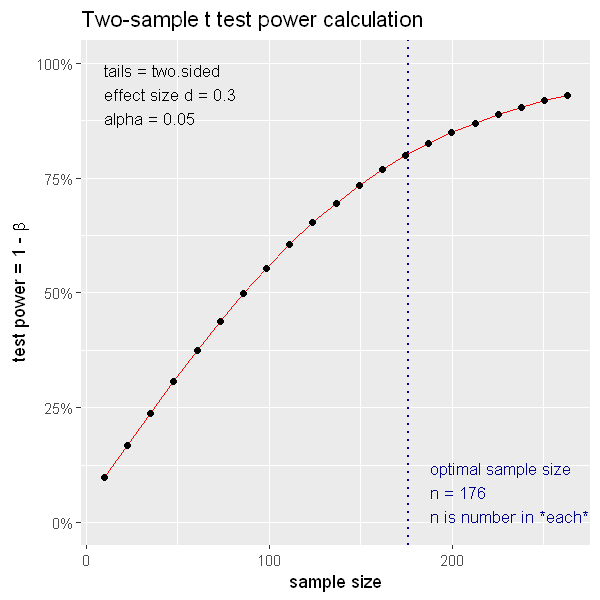

In [14]:
power_plot_data <- pwr.t.test(d=0.30, n=NULL, sig.level=0.05, power = 0.8, alternative = "two.sided")
plot(power_plot_data)